In [13]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict
import time

%matplotlib inline
np.random.seed(1)

In [29]:
def load_parameters(sess):

    W1 = sess.run('W1:0')
    W2 = sess.run('W2:0')
    W3 = sess.run('W3:0')
    b1 = sess.run('b1:0')
    b2 = sess.run('b2:0')
    b3 = sess.run('b3:0')

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    #print(parameters)
    return parameters


INFO:tensorflow:Restoring parameters from ./hand-signs-500
Your algorithm predicts: y = 3


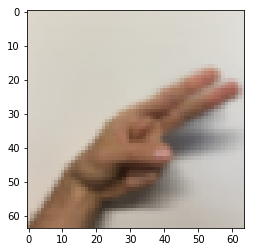

In [36]:
import scipy
from PIL import Image
from scipy import ndimage

my_image = "hand2.png"
#my_image = "thumbs_up.jpg"

# We preprocess your image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))

# print(image.shape)
plt.imshow(image)

my_image = scipy.misc.imresize(image, size=(64,64)).reshape((1, 64*64*3)).T

with tf.Session() as sess:
    meta = 'hand-signs-500.meta'
    saver = tf.train.import_meta_graph(meta)
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    parameters = load_parameters(sess)
    
    my_image_prediction = predict(my_image, parameters)
    print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))